# Задача 2. Глобальная оптимизация

Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
1. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
2. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
3. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [3]:
# импорт библиотек

import math
from scipy.optimize import differential_evolution

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 15, 10

Исходная функция $$f(x) = \sin(\frac{x}{5}) * \exp(\frac{x}{10}) + 5 * \exp(\frac{-x}{2})$$

In [4]:
def f(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

x = [i for i in range(1, 31)]
y = [f(i) for i in x]

Визуализация исходной функции

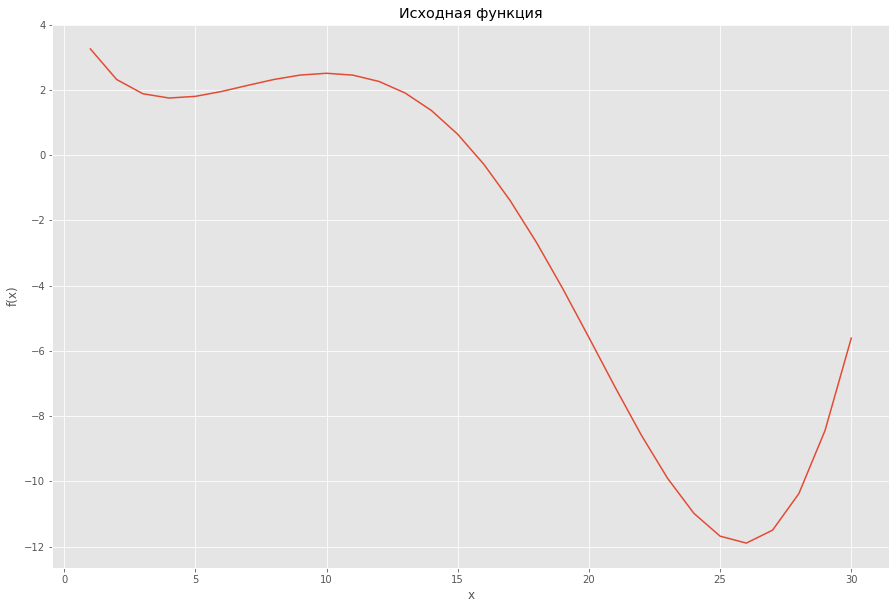

In [5]:
ax = sns.lineplot(x, y)
ax.set(xlabel='x', ylabel='f(x)', title='Исходная функция');

Поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]

In [6]:
answer1 = round(differential_evolution(f, [(1, 30)])['fun'], 2)
print("min =", answer1)

min = -11.9


Запись ответа в файл

In [8]:
with open('answer2.txt', 'w') as f:
    f.write('{:.2f}'.format(answer1))

Дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке